<a href="https://colab.research.google.com/github/srivatsalnarayan/TD-ML-Projects/blob/main/srivatsal_narayan_student_marks_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

load data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student_marks_predictor/student .csv")

exploratory data analytics

In [ ]:
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.shape

(25, 2)

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df['Hours'].value_counts()

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

In [ ]:
df['Scores'].value_counts()

30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: Scores, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Vizualizing Data

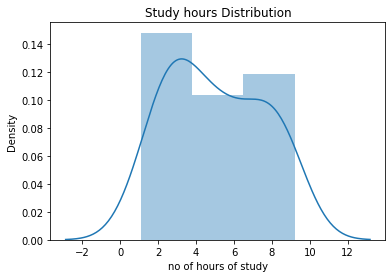

In [ ]:
sns.distplot(df['Hours'])
plt.xlabel('no of hours of study')
plt.title('Study hours Distribution')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


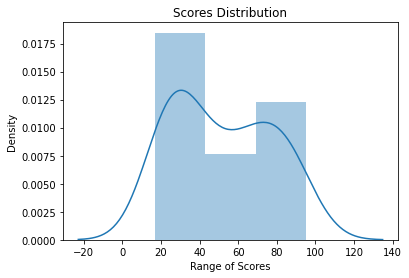

In [ ]:
sns.distplot(df['Scores'])
plt.xlabel('Range of Scores')
plt.title('Scores Distribution')
plt.show()


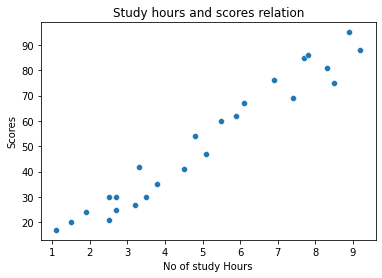

In [ ]:
sns.scatterplot(data=df, x='Hours',y='Scores')
plt.xlabel('No of study Hours')
plt.title('Study hours and scores relation')
plt.show()

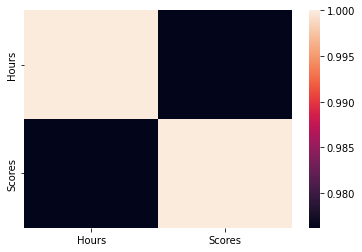

In [ ]:
sns.heatmap(df.corr())
plt.show()

preparing data

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Splitting Dependent and indepent Data

In [ ]:
x=df.loc[:,['Hours']]
y=df.loc[:,['Scores']]

In [ ]:
x.shape

(25, 1)

In [ ]:
y.shape

(25, 1)

Test Train Spit

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
x_train.shape

(18, 1)

In [ ]:
x_test.shape

(7, 1)

In [ ]:
y_train.shape

(18, 1)

In [ ]:
x_test.shape

(7, 1)

modelling

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([[72.01422812],
       [89.05571703],
       [77.3396934 ],
       [33.67087806],
       [96.51136843],
       [27.28031972],
       [18.75957527]])

In [ ]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Original_Marks','Predicted_Marks'])

,Hours,Original_Marks,Predicted_Marks
0,6.9,76.0,72.014228
1,8.5,75.0,89.055717
2,7.4,69.0,77.339693
3,3.3,42.0,33.670878
4,9.2,88.0,96.511368
5,2.7,30.0,27.280320
6,1.9,24.0,18.759575


model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
print("Score:",model.score(x_test,y_pred))
print()
print('Mean Squared Error', mean_squared_error(y_test,y_pred))
print('r2 Score',r2_score(y_test,y_pred))

Score: 1.0

Mean Squared Error 65.6680602593837
r2 Score 0.8799621371069983


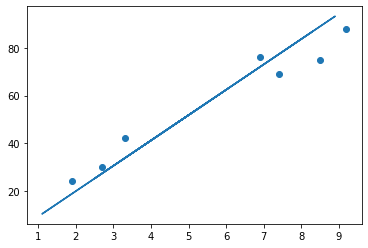

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_train,model.predict(x_train))


Saving Model

In [ ]:
import joblib
joblib.dump(model,'Marks_prediction.pkl')

['Marks_prediction.pkl']

loading model

In [ ]:
joblib.load('Marks_prediction.pkl')

LinearRegression()

In [ ]:
model.predict([[5]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


51.7774600346913

In [ ]:
model.predict([[8]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


83.73025174628475